# In2Research Code

We've written some simulations to introduce you to how computers can be used in research!

This code has been written in the Python programming language, here is a helpful website in case you want to explore a bit more yourself: https://www.w3schools.com/python/python_intro.asp.

You can run blocks of code (grey blocks) in this "notebook" by pressing the play button in the top bar or [shift]+[enter] on your keyboard after you've clicked on the block of code.

If you have any questions about how anything works please ask any of the members in the lab for help!

Simulations are very useful in research for when you need to repeat calculations many times, or when you need to generate lots of different random numbers.

First consider some simple maths (give it a go by changing what "a" is equal to using the maths operations: +, -, *, /):

In [1]:
a = 14 * 7;
print(a);

98


You can use Python for any maths you would normally use a calculator for, for example using the quadratic formula to solve:

$$y = x^2 - 4x + \frac{7}{4}$$

In [2]:
import math

a = 1;
b = -4;
c = 1.75;
det = (b ** 2) - (4 * a * c);
q1 = -((b + math.sqrt(det)) / (2 * a));
q2 = -((b - math.sqrt(det)) / (2 * a));

print("y = (x -", q1, ")( x -", q2, ")");

y = (x - 0.5 )( x - 3.5 )


Next we'll generate random numbers between 0 and 1 in a "loop".

Try changing the value of the "nLoops" variable to generate more or fewer random numbers.

In [3]:
import random

nLoops = 10;

for i in range(0, nLoops):
    
    r = random.uniform(0, 1);
    print(r);

0.1960378582250457
0.5371074331658459
0.45654137148333973
0.1538148983213128
0.3509461705469653
0.8186712093609648
0.3179044216738167
0.8394010909361782
0.5630608103003494
0.6740903047283964


Generating lots of random numbers is useful, but first let's check whether the numbers we're making are **truly** random.

We can do this by counting the number of times we see numbers that lie within different ranges, and then checking that we see the roughly the same amount within each range.

The output of this block of code is the number of random numbers that are observed in each range or "bin".

Try changing the value of the "nLoops" variable to change the number of random numbers that are generated, and the value of the "binWidth" variable to change the range of the "bins" we're looking for random numbers in.

Since this form of random number generation is expected to be random, we expect that we'll see "nLoops $\times$ binWidth" random numbers within each bin, is this always the case?

In [5]:
import numpy as np

nLoops = 100;
binWidth = 0.1;
nBins = math.ceil(1. / binWidth);
counts = np.zeros(nBins);

for i in range(0, nLoops):
    
    r = random.uniform(0, 1);
    
    for j in range(0, nBins):
        
        if (r >= j * binWidth) and (r <= (j + 1) * binWidth):
            
            counts[j] += 1;

print(counts);

[10. 11. 14.  9.  7.  9. 12. 10. 10.  8.]


Code is also very useful for drawing graphs, which can be difficult to do accurately by hand.

This block of code will plot the previous result of how many random numbers were found in each bin, is the distribution as flat as you were expecting?

What happens if you increase "nLoops" or change the "binWidth" in the previous block of code?

(Remember that each time you change the previous block of code you'll need to rerun it to be able to plot the results here!)

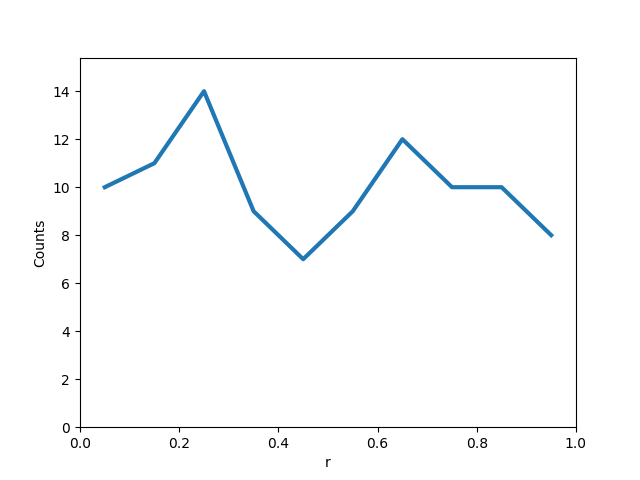

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(binWidth / 2., (nBins * binWidth) - (binWidth / 2.), nBins);

plt.plot(x, counts, linewidth=3.0);
plt.xlabel('r');
plt.xlim([0, 1]);
plt.ylabel('Counts');
plt.ylim([0, 1.1 * max(counts)]);
plt.show();

Now we want to use the different code we've seen so far and the random numbers we've been generating to study some physics!

First we're going to think about particles that are **diffusing**: this is the random motion of very small particles such as dust in the air (http://hyperphysics.phy-astr.gsu.edu/hbase/Kinetic/diffus.html).

We're going to study this by looking at a particle that starts at the position "initPos", and moves left or right on a line with probabilities "pLeft" and "pRight" during each iteration of a loop.

Since we're considering a real physical system now, each iteration of a loop represents one timestep, so at the end of the simulation we can see the path of the particle as a function of time.

Try changing the values of each of these input variables and see how the dynamics of the particle changes.

You can also try changing the number of particles in the simulation and the time the simulation runs for, but increasing either of these too much will make the simulation take a long time to run!

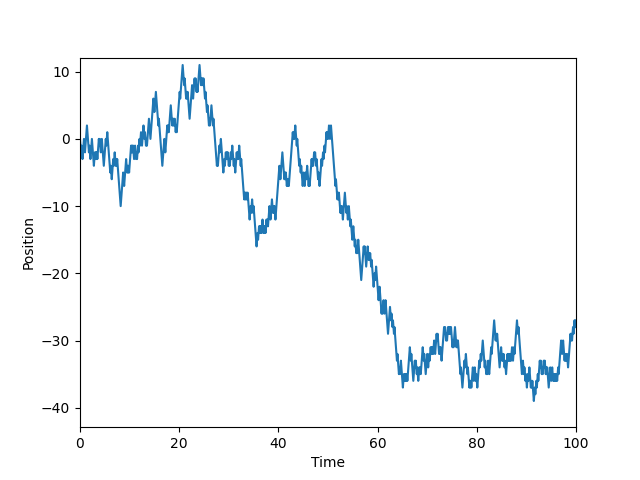

In [7]:
pLeft = 0.5;
pRight = 0.5;
initPos = 0;

nParticles = 1;
tMax = 100;

tPerStep = 0.1;
nt = round((tMax / tPerStep) + 1);

xPerStep = 1;
xMin = initPos + 1;
xMax = initPos - 1;

pos = np.zeros((nParticles, nt, 2));

for n in range(0, nParticles):

    pos[n, 0] = [0, initPos];

    for i in range(1, nt):

        r = random.uniform(0, 1);

        if r < pLeft:
            move = -xPerStep;
        elif (r >= pLeft) and (r < pLeft + pRight):
            move = xPerStep;
        else:
            move = 0;

        pos[n, i] = [i * tPerStep, pos[n, i - 1, 1] + move];

    xMin = min(xMin, min(pos[n, :, 1]));
    xMax = max(xMax, max(pos[n, :, 1]));
    plt.plot(pos[n, :, 0], pos[n, :, 1]);

plt.xlabel('Time');
plt.xlim([0, tMax]);
plt.ylabel('Position');
plt.ylim([min(0.9 * xMin, 1.1 * xMin), max(0.9 * xMax, 1.1 * xMax)]);
plt.show();

Just like we did for the random numbers we generated before, now we're going to bin our data and plot how many times the particles were at each position.

Try changing the "binWidth" or going back and running different simulations, does the distribution look like you'd expect?

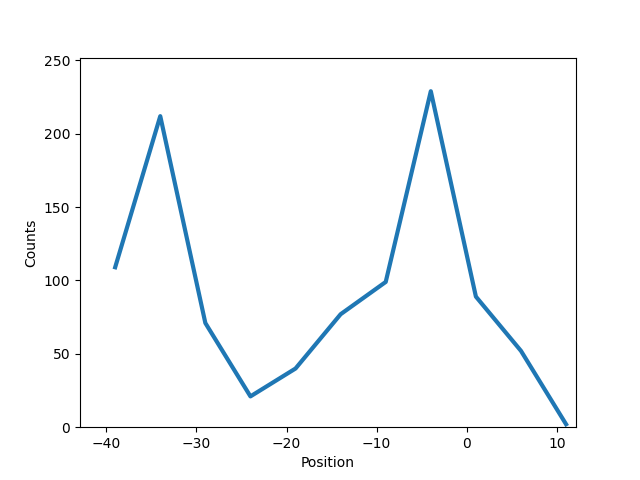

In [8]:
binWidth = 5 * xPerStep;
nBins = math.ceil((xMax - xMin + 1) / binWidth);
counts = np.zeros(nBins);
                
x = np.linspace(xMin, xMax, nBins);

for n in range(0, nParticles):

    for i in range(0, nt):
        
        value = pos[n, i, 1];
        index = math.floor((value - xMin) / binWidth);
        
        counts[index] += 1;

plt.plot(x, counts, linewidth=3.0);
plt.xlabel('Position');
plt.xlim([min(0.9 * xMin, 1.1 * xMin), max(0.9 * xMax, 1.1 * xMax)]);
plt.ylabel('Counts');
plt.ylim([0, 1.1 * max(counts)]);
plt.show();

Up to now we've only been thinking about particles that diffuse, but what if they also **degrade** (are removed from the simulation) at a rate "kDegrade"?

Because the loop in the simulation represents time, each particle has a probability roughly equal to "kDegrade × tPerStep" of degrading per loop (or timestep).

Try changing the simulation input variables like you have before and see how they change the trajectories of the particle(s).

The time these simulations take to run is equal to the time it takes for all of the particles to degrade, so setting too small a degradation rate "kDegrade" will make the simulation take a long time to run!

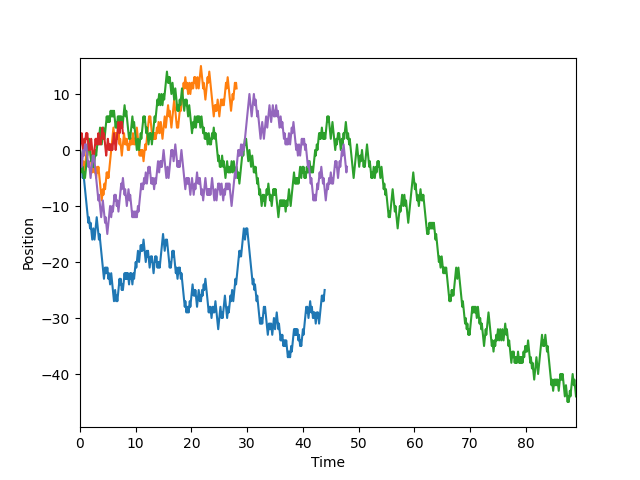

In [9]:
pLeft = 0.5;
pRight = 0.5;
kDegrade = 0.01;
initPos = 0;
nParticles = 5;

tPerStep = 0.1;
tMax = 0;

xPerStep = 1;
xMin = initPos + 1;
xMax = initPos - 1;

allPos = [];

for n in range(0, nParticles):
    
    pos = [];
    pos.append([0, initPos]);

    for i in range(1, nt):
        
        r = random.uniform(0, 1);
        
        if r < kDegrade * tPerStep:
            break;

        r = random.uniform(0, 1);

        if r < pLeft:
            move = -xPerStep;
        elif (r >= pLeft) and (r < pLeft + pRight):
            move = xPerStep;
        else:
            move = 0;

        pos.append([i * tPerStep, pos[i - 1][1] + move]);
    
    splitPos = list(zip(*pos));
    tMax = max(tMax, max(splitPos[0]));
    xMin = min(xMin, min(splitPos[1]));
    xMax = max(xMax, max(splitPos[1]));
    plt.plot(splitPos[0], splitPos[1]);
    
    allPos.append(pos);

plt.xlabel('Time');
plt.xlim([0, tMax]);
plt.ylabel('Position');
plt.ylim([min(0.9 * xMin, 1.1 * xMin), max(0.9 * xMax, 1.1 * xMax)]);
plt.show();

We can check again how many times the particles were at each position.

Are there any values for the input variables where the distribution here is very different to the case without degradation?

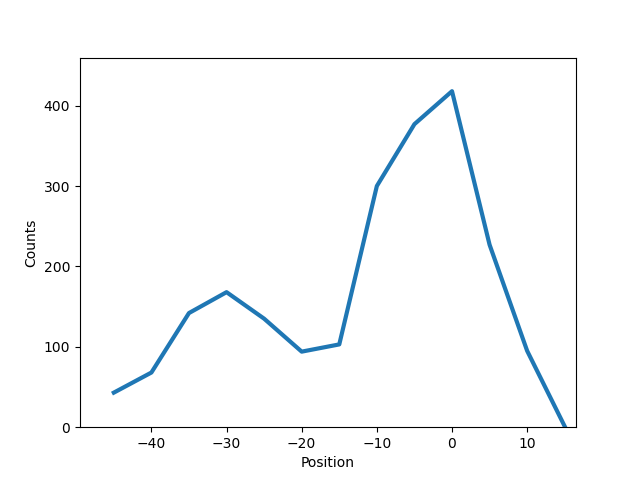

In [10]:
binWidth = 5 * xPerStep;
nBins = math.ceil((xMax - xMin + 1) / binWidth);
counts = np.zeros(nBins);
                
x = np.linspace(xMin, xMax, nBins);

for n in range(0, nParticles):

    for i in range(0, len(allPos[n])):
        
        value = allPos[n][i][1];
        index = math.floor((value - xMin) / binWidth);
        
        counts[index] += 1;

plt.plot(x, counts, linewidth=3.0);
plt.xlabel('Position');
plt.xlim([min(0.9 * xMin, 1.1 * xMin), max(0.9 * xMax, 1.1 * xMax)]);
plt.ylabel('Counts');
plt.ylim([0, 1.1 * max(counts)]);
plt.show();

Now that we have a better understanding of the dynamics of individual particles that diffuse and degrade, imagine a system that contains a very large number of these particles, which are all diffusing and degrading at the same time.

In this case it’s easier to talk about the **concentration** of particles, which is equal to the number of particles per unit volume.

Instead of looking at the probability of each particle moving to the left or the right each timestep, we’re now interested in the concentration of particles that moves each timestep (remember that in general diffusing particles move from regions of higher concentration to regions of lower concentration).

In this lab we study the dynamics of **morphogens**, which are small particles that diffuse and degrade after being produced at one edge of a tissue (https://en.wikipedia.org/wiki/Morphogen).

We’re particularly interested in the shape of the morphogen concentration distribution, which governs which cells in the tissue will differentiate into different types (https://en.wikipedia.org/wiki/French_flag_model).

Another nice thing about coding is that large chunks of code or code you want to be repeated multiple times can be separated into “functions” that can then be run by typing a single line of code.

Here we define the function that will describe how the concentration of particles at each position (consisting of many particles like those we simulated previously) will change each timestep.

This block of code won't output any numbers or graphs itself, but after defining the function we'll be able to run all of the code inside it simply by typing:

$$\text{concentration = Solve(D, kDegrade, source, tissueSize, nx, tMax)}$$

In [16]:
def Solve(D, kDegrade, source, tissueSize, nx, tMax):
    
    xPerStep = tissueSize / (nx - 1);
    
    tPerStep = 0.5 * (1 / (((2 * D) / (xPerStep ** 2)) + kDegrade));
    nt = round((tMax / tPerStep) + 1);
    
    D *= tPerStep / (xPerStep ** 2);
    kDegrade *= tPerStep;
    source *= tPerStep / xPerStep;
    
    conc = np.zeros((nt, nx));
    
    for i in range(1, nt):
        
        for j in range(0, nx):

            if j == 0:
                conc[i, j] = ((1 - (2 * D) - kDegrade) * conc[i - 1, j]) + (2 * D * conc[i - 1, j + 1]) + source;
            elif j == nx - 1:
                conc[i, j] = ((1 - (2 * D) - kDegrade) * conc[i - 1, j]) + (2 * D * conc[i - 1, j - 1]);
            else:
                conc[i, j] = ((1 - (2 * D) - kDegrade) * conc[i - 1, j]) + (D * (conc[i - 1, j + 1] + conc[i - 1, j - 1]));
    
    err = sum(abs(conc[nt - 1] - conc[nt - 2])) / sum(conc[nt - 1]);
    print('Error is:', err, '(aim for < 1.0e-8)');
                
    return conc[nt - 1];

We can now run simulations of how the concentration of particles changes over time using a nice and small block of code.

Try changing the diffusivity “D”, the degradation rate “kDegrade”, the source of particles at the edge of the tissue “source”, and the tissue size “”tissueSize”, and see how the concentration distribution changes.

These simulations will run until a time "tMax", but the timestep "tPerStep" will be set in the above function to make sure the simulations aren't unstable.

The aim is for these simulations to run long enough that the system reaches a steady-state, or so that the concentration at each position doesn't change anymore between timesteps.

For this reason, "tMax" should be set to a large enough value that steady-state is reached (the average change in concentration between timesteps is less than $10^{-8}$), but small enough that the simulation doesn't take too long to run!

Error is: 4.503157721434348e-09 (aim for < 1.0e-8)


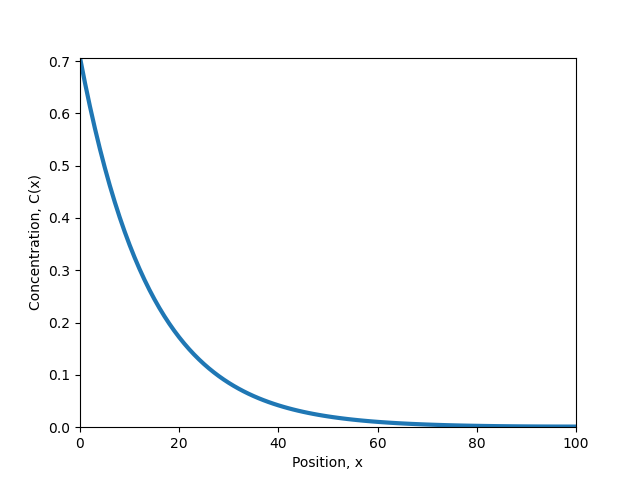

In [17]:
D = 10;
kDegrade = 0.05;
source = 1;
tissueSize = 100;
tMax = 250;

nx = 101;
x = np.linspace(0, tissueSize, nx);
r = np.linspace(0, 1, nx);

conc = Solve(D, kDegrade, source, tissueSize, nx, tMax);

plt.plot(x, conc, linewidth=3.0);
plt.xlabel('Position, x');
plt.xlim([0, tissueSize]);
plt.ylabel('Concentration, C(x)');
plt.ylim([0, max(conc)]);
plt.show();

Finally, we’re going to investigate how well the concentration distribution we generated before “scales” with an increasing system size.

A distribution is said to “scale” if it’s **shape** doesn’t change as the tissue size increases.

One example of this is, your heart will stay the same size relative to the size of your body as your body grows.

We can test whether a distribution scales by plotting the normalised concentration (the concentration divided by its maximum value) against the variable $r=x/L$ instead of just $x$.

Try running simulations with different values of $tissueSize$ than you used in your previous simulation (in the above block of code), and see whether you can make the two distributions overlap perfectly when plotted against $r$ (the bottom plot) by changing the diffusivity “D”, the degradation rate “kDegrade”, and/or the source of particles at the edge of the tissue “source”.

These are the types of simulations we do in our research to find the relationships between the diffusivity, the degradation rate, the source of particles at the edge of the tissue, and the tissue size that are required for the scaling of tissues and organs we see in humans and animals as they grow.

Error is: 4.503157721434348e-09 (aim for < 1.0e-8)


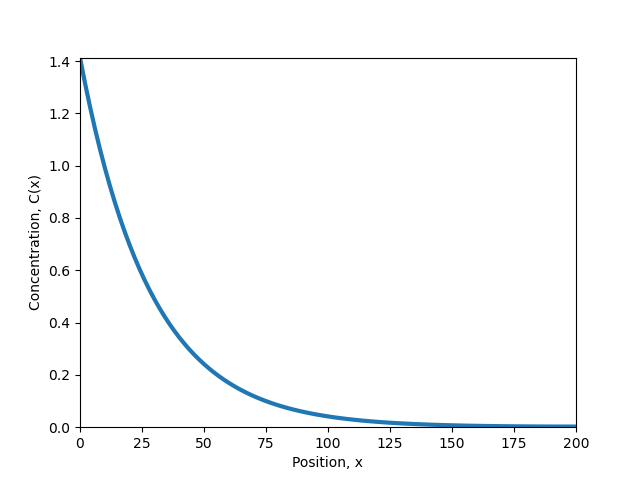

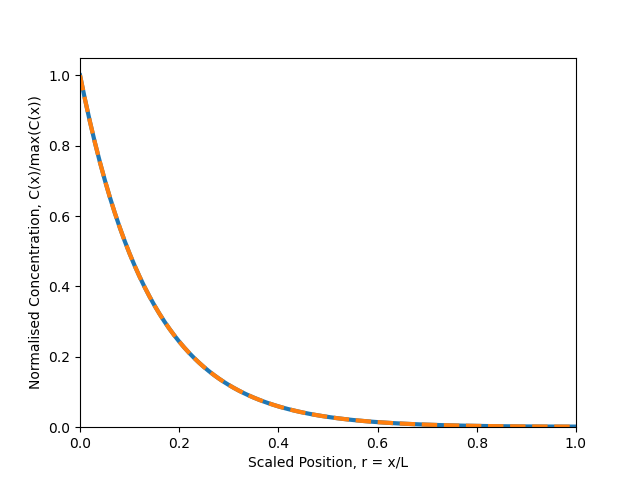

In [18]:
D = 10;
kDegrade = 0.05 / 4;
source = 1;
tissueSize = 200;
tMax = 1000;

nx = 101;
x2 = np.linspace(0, tissueSize, nx);
r2 = np.linspace(0, 1, nx);

conc2 = Solve(D, kDegrade, source, tissueSize, nx, tMax);

plt.plot(x2, conc2, linewidth=3.0);
plt.xlabel('Position, x');
plt.xlim([0, tissueSize]);
plt.ylabel('Concentration, C(x)');
plt.ylim([0, max(conc2)]);
plt.show();

plt.plot(r, conc / max(conc), linewidth=3.0);
plt.plot(r2, conc2 / max(conc2), '--', linewidth=3.0);
plt.xlabel('Scaled Position, r = x/L');
plt.xlim([0, 1]);
plt.ylabel('Normalised Concentration, C(x)/max(C(x))');
plt.ylim([0, 1.05]);
plt.show();

We hope you enjoyed this quick tutorial of Python code and how we use it in our research!

Feel free to ask our lab members any questions you have about the code here or our research in general!